In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


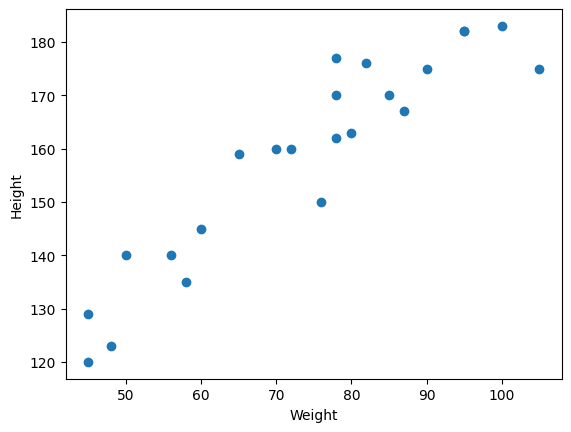

In [3]:
## Scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [4]:
## Correalation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


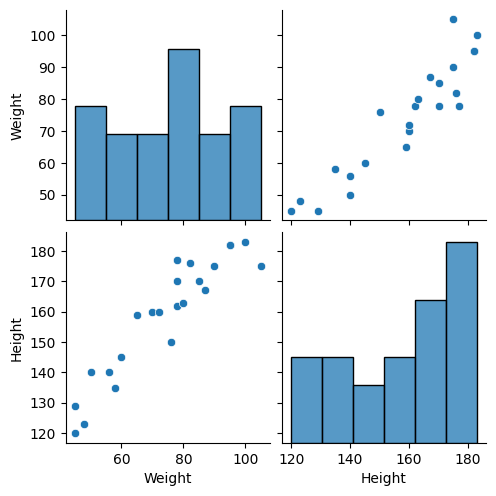

In [5]:
## Seaborn for visualization
import seaborn as sns
sns.pairplot(df)
plt.show()

In [6]:
## Independent and dependent features
X=df[['Weight']] ## independent features should be a dataframe or 2D array
y=df['Height'] ## this variable can be in series or 1d array

In [7]:
X_Series=df['Weight']
np.array(X).shape

(23, 1)

In [8]:
np.array(y).shape

(23,)

In [9]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [12]:
X_train.shape, y_train.shape

((17, 1), (17,))

In [13]:
## Standardization
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [19]:
X_test=scaler.transform(X_test)

In [20]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [21]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [24]:
regression=LinearRegression(n_jobs=-1)

In [25]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [28]:
print("Coefficient or slope",regression.coef_)
print("Intercept",regression.intercept_)

Coefficient or slope [17.2982057]
Intercept 156.47058823529412


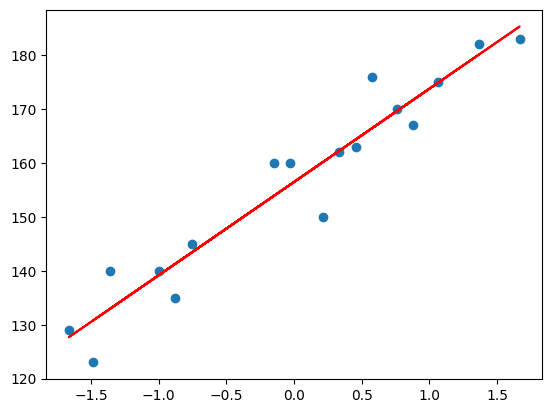

In [31]:
## plot the Training data best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train,regression.predict(X_train),color="red")

### Prediction of test data
1. predicted height output = intercept + coeff_(weights)
2. y_pred_test = 156.470 + 17.29(X_test)

In [32]:
## Prediction for test data
y_pred=regression.predict(X_test)

In [33]:

## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [34]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


# R square

Formula

R^2=1-(SSR/SST)

R^2=Coefficient of determination

SSR=sum of squares of residuals

SST=total sum of squares

In [35]:
from sklearn.metrics import r2_score

In [36]:
score=r2_score(y_test,y_pred)
score

0.7360826717981276

**Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]**

R2: The R2 of the model

n: The number of observations

k: The number of predictor variables


In [37]:
## Display the adjusted R-squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [41]:
## OLS Linear Regression
import statsmodels.api as sm

In [42]:
model=sm.OLS(y_train,X_train).fit()

In [43]:
prediction=model.predict(X_test)

In [44]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Mon, 03 Nov 2025   Prob (F-statistic):                       0.664
Time:                        15:11:55   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [46]:
## Prediction for new data
regression.predict(scaler.transform([[72]]))

c:\Kashyap\anacond3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])